# <font color = orange>K-Nearest Neighbors Algorithm</font>
___

**K-Nearest Neighbors** is a Machine Learning Algorithm, which is used to classify samples based on their similarities to existing data or to solve regression problems.\
K-Nearest Neighbors is frequently used on **small** or **medium** size datasets, and it is inconvenient to use it for **large** ones due to slowness of the process.\
Also the algorithm is simple and easy to implement.

## Algorithm itself

- **1)** Load data
- **2)** Initialize K 
- **3)** Find distances between query and other data points\
**Types of distances**:
    - Euclidian
    - Manhattan\
    and so on...
- **4)** Select K nearest points with **smallest distance**
- **5)** If **classification**, return the **most common class** amongst neighbors\
If **regression**, return the **mean**.

## Implementation

In [74]:
#importing libraries, setting matplotlib to inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [112]:
#Randomly initialize data
np.random.seed(225)
age = np.random.randint(30,61,40)
result = np.random.randint(0,2,40)
height = np.random.randint(140,201,40)
data = pd.DataFrame({'Age': age,
                     'Height': height,
                    'Likes apples': result})

In [113]:
data.head(7)

,Age,Height,Likes apples
0,33,162,0
1,30,192,0
2,48,143,0
3,44,178,1
4,43,195,0
5,53,176,0
6,58,181,0


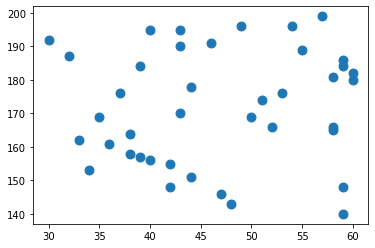

In [114]:
#All the data points
plt.scatter(data['Age'], data['Height'], s = 80)

In [115]:
#Separate people (Those, who like and don't like apples)
like = data[data['Likes apples'] == 1].drop('Likes apples', axis = 1)
nlike = data[data['Likes apples'] == 0].drop('Likes apples', axis = 1)

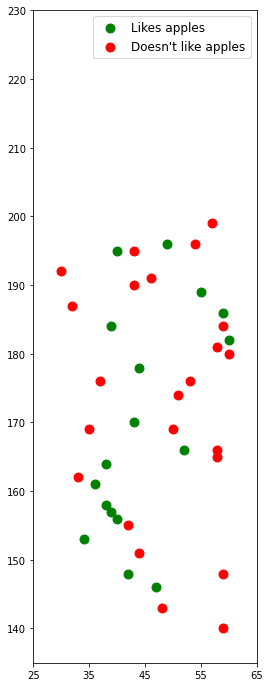

In [116]:
#Add more info to the plot
fig = plt.figure(figsize = [4,12])
ax = plt.axes()
ax.scatter(like['Age'], like['Height'], c ='green', s = 80, label = "Likes apples")
ax.scatter(nlike['Age'], nlike['Height'], c ='red', s = 80, label = "Doesn't like apples")
ax.set_xticks([i for i in range(25,66,10)])
ax.set_yticks([i for i in range(120,231,10)])
ax.set_ylim([135,230])
ax.set_xlim([25,65])
ax.legend(fontsize = 'large')

Let's predict whether people like apples:\
1) 34 y.o. , 165 cm in height\
2) 58 y.o., 178 cm in height

In [117]:
#Importint KNN algorithm from sklearn library
from sklearn.neighbors import KNeighborsClassifier as KNN

In [118]:
#Creating a model with euclidean metric and k = 5
model = KNN(n_neighbors = 5, metric = 'euclidean')
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
#Fitting the data
model.fit(X = data.drop('Likes apples', axis = 1), y = data['Likes apples'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
#Predicting the taste of different people
h_34 = [[34, 165]]
h_58 = [[58,178]]
h_34 = model.predict(h_34)
h_58 = model.predict(h_58)
print(h_34)
print(h_58)

[1]
[0]


According to our data:\
1) 34 y.o. , 165 cm in height ---> Likes apples\
2) 58 y.o., 178 cm in height ---> Doesn't like apples